# Constraint Satisfaction Matcher

The ConstraintSatisfactionMatcher can be used to optimize any linear function of the baseline covariates. In this demo notebook, we show how to call the matcher in the PyBalance library.

In [1]:
import logging 
logging.basicConfig(
    format="%(levelname)-4s [%(filename)s:%(lineno)d] %(message)s",
    level='INFO',
)
from pybalance.utils import (
    BetaBalance, 
    BetaXBalance, 
    GammaBalance, 
    GammaXBalance,
    GammaXTreeBalance
)
from pybalance.datasets import load_toy_data
from pybalance.cs import ConstraintSatisfactionMatcher
from pybalance.visualization import (
    plot_numeric_features, 
    plot_categoric_features, 
    plot_binary_features,
    plot_per_feature_loss,
    plot_joint_numeric_distributions
)

INFO [__init__.py:15] Loaded pybalance version 0.1.0.


In [2]:
time_limit = 300

In [3]:
m = load_toy_data()
m

,age,weight,height,gender,country,haircolor,binary_0,binary_1,binary_2,binary_3,population
0,27.645573,99.109461,166.063797,1.0,3,0,0.0,1.0,0.0,1.0,pool
1,33.210317,77.522517,148.959166,1.0,4,0,0.0,0.0,0.0,0.0,pool
2,31.281790,77.648391,126.943639,1.0,4,0,0.0,1.0,0.0,0.0,pool
3,37.924484,104.850881,170.009417,1.0,3,0,0.0,1.0,0.0,1.0,pool
4,60.925960,72.027406,144.841497,0.0,3,1,0.0,0.0,0.0,0.0,pool
...,...,...,...,...,...,...,...,...,...,...,...
10995,55.312681,54.187498,165.066254,1.0,5,2,0.0,0.0,0.0,1.0,target
10996,52.996259,67.788246,166.339659,1.0,4,2,0.0,1.0,0.0,0.0,target
10997,48.535829,76.827444,145.047366,1.0,1,1,0.0,0.0,0.0,0.0,target
10998,35.395455,60.470689,157.368874,1.0,4,0,0.0,0.0,0.0,0.0,target


## Optimize Beta (Mean Absolute SMD)

In [4]:
objective = beta = BetaBalance(m)
matcher = matcher_beta = ConstraintSatisfactionMatcher(
    m, 
    time_limit=time_limit,
    objective=objective,
    ps_hinting=True,
    parallel_solve=True)
matcher.get_params()

INFO [matcher.py:58] Scaling features by factor 2.00 in order to use integer solver with <= 0.1% loss.
INFO [matcher.py:61] With this scaling, the smallest value 1.0 is represented by 2.


{'objective': 'beta',
 'match_size': 1000,
 'time_limit': 300,
 'parallel_solve': True,
 'ps_hinting': True,
 'verbose': True}

In [5]:
matcher.match()

INFO [matcher.py:308] Solving for match population with size = 1000. Will match on 15 dimensions ...
INFO [matcher.py:324] Calculating bounds on feature variables ...
INFO [matcher.py:339] Applying constraints ...
INFO [matcher.py:367] Training PS model as guide for solver ...
/pybalance/pybalance/cs/matcher.py:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.loc[:, "ix"] = list(range(len(target)))
/pybalance/pybalance/cs/matcher.py:370: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool.loc[:, "ix

,age,weight,height,gender,country,haircolor,binary_0,binary_1,binary_2,binary_3,population
10000,25.588819,90.287540,138.373950,0.0,0,1,0.0,0.0,0.0,0.0,target
10001,58.178781,112.772237,131.676125,1.0,5,1,0.0,0.0,0.0,1.0,target
10002,45.214552,58.472329,174.666188,0.0,0,2,0.0,0.0,0.0,0.0,target
10003,42.283849,90.594823,141.086083,1.0,4,0,0.0,0.0,0.0,0.0,target
10004,67.793860,53.067147,187.259975,1.0,2,1,0.0,0.0,0.0,0.0,target
...,...,...,...,...,...,...,...,...,...,...,...
9954,21.351757,57.009399,169.493820,1.0,3,1,0.0,0.0,0.0,0.0,pool
9960,49.103361,54.074359,159.885321,1.0,4,2,0.0,0.0,0.0,1.0,pool
9962,43.438432,53.863295,149.091864,1.0,2,1,1.0,0.0,0.0,0.0,pool
9976,61.313076,96.643142,144.545217,0.0,5,2,0.0,0.0,0.0,0.0,pool


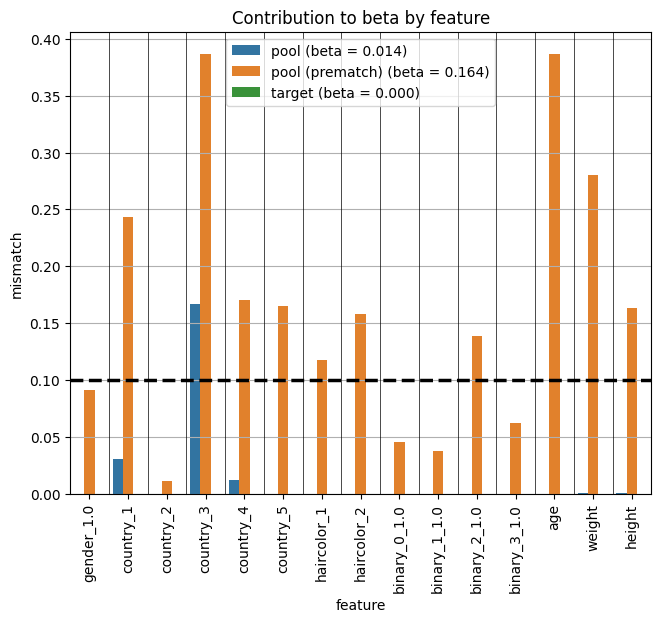

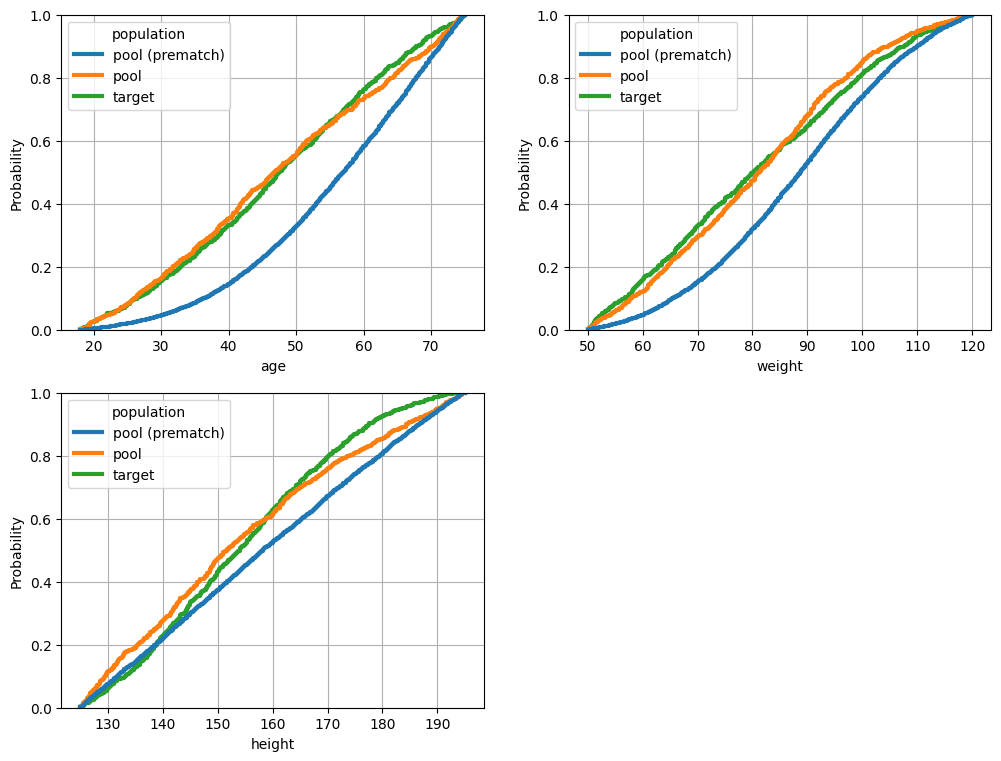

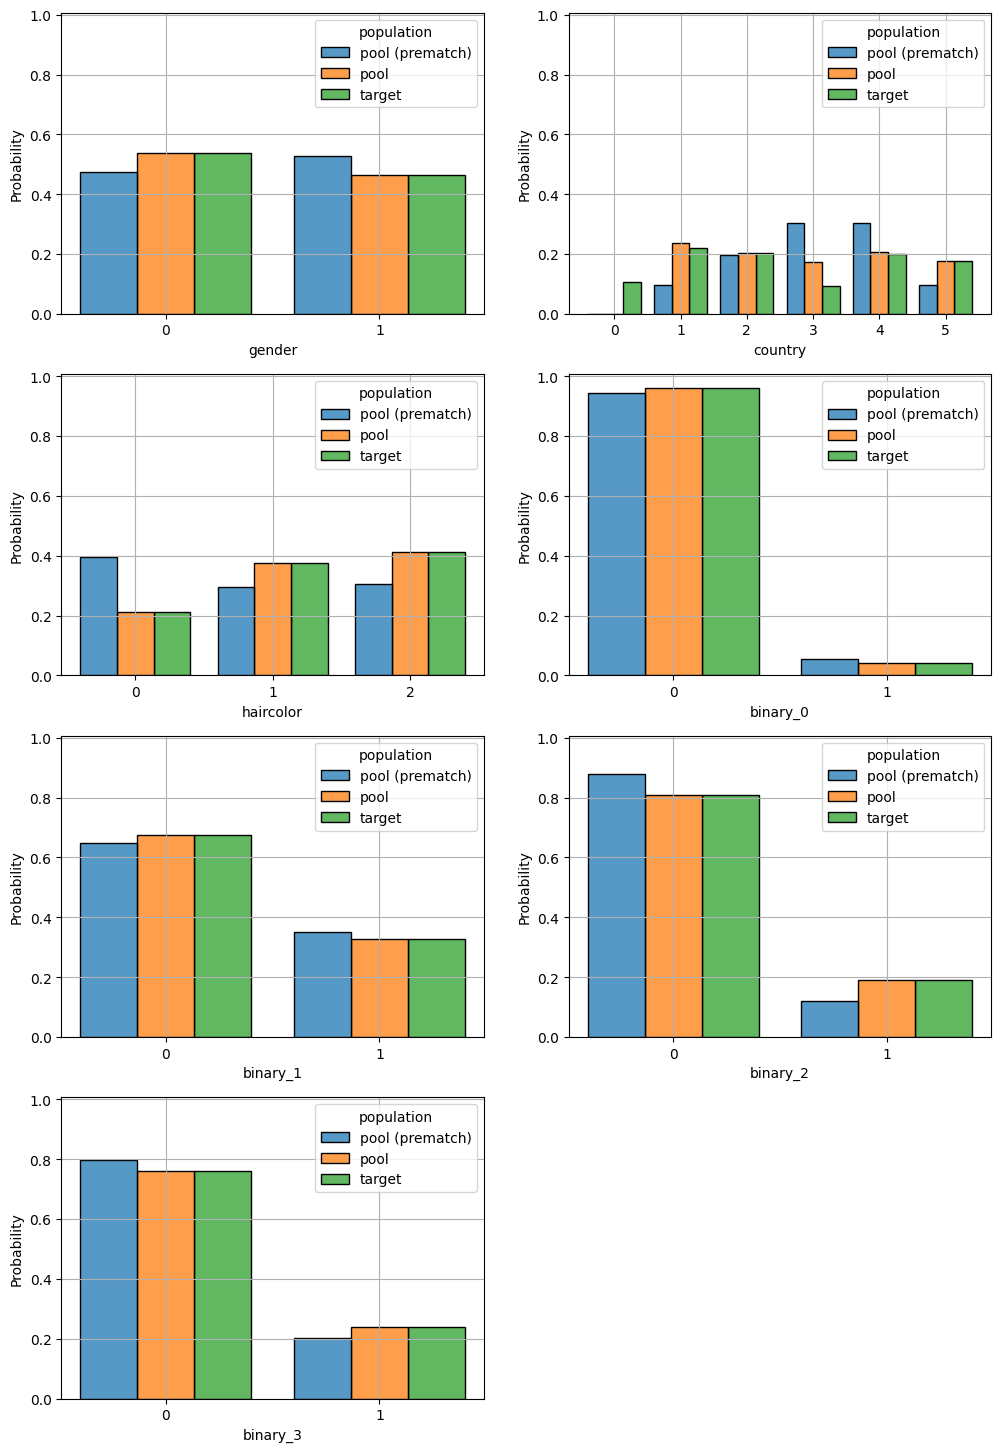

In [6]:
%matplotlib inline

match = matcher.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, beta, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])


## Optimize Beta With Cross Terms Added

In [7]:
objective = beta_x = BetaXBalance(m)
matcher = matcher_betax = ConstraintSatisfactionMatcher(
    m, 
    time_limit=time_limit,
    objective=objective,
    ps_hinting=True,
    parallel_solve=True)
matcher.get_params()

INFO [matcher.py:58] Scaling features by factor 238515766.62 in order to use integer solver with <= 0.1% loss.
INFO [matcher.py:61] With this scaling, the smallest value 1.0986228744513937e-06 is represented by 262.


{'objective': 'beta_x',
 'match_size': 1000,
 'time_limit': 300,
 'parallel_solve': True,
 'ps_hinting': True,
 'verbose': True}

In [8]:
matcher.match()

INFO [matcher.py:308] Solving for match population with size = 1000. Will match on 40 dimensions ...
INFO [matcher.py:324] Calculating bounds on feature variables ...
INFO [matcher.py:339] Applying constraints ...
INFO [matcher.py:367] Training PS model as guide for solver ...
/pybalance/pybalance/cs/matcher.py:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.loc[:, "ix"] = list(range(len(target)))
/pybalance/pybalance/cs/matcher.py:370: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool.loc[:, "ix

,age,weight,height,gender,country,haircolor,binary_0,binary_1,binary_2,binary_3,population
10000,25.588819,90.287540,138.373950,0.0,0,1,0.0,0.0,0.0,0.0,target
10001,58.178781,112.772237,131.676125,1.0,5,1,0.0,0.0,0.0,1.0,target
10002,45.214552,58.472329,174.666188,0.0,0,2,0.0,0.0,0.0,0.0,target
10003,42.283849,90.594823,141.086083,1.0,4,0,0.0,0.0,0.0,0.0,target
10004,67.793860,53.067147,187.259975,1.0,2,1,0.0,0.0,0.0,0.0,target
...,...,...,...,...,...,...,...,...,...,...,...
9974,40.567552,78.405788,126.061745,0.0,4,2,0.0,0.0,0.0,0.0,pool
9983,45.202076,100.346586,131.958789,0.0,3,0,0.0,0.0,0.0,0.0,pool
9987,19.292851,74.783710,157.628330,0.0,1,2,0.0,1.0,0.0,0.0,pool
9992,60.903116,73.738442,168.039251,1.0,2,2,0.0,0.0,1.0,0.0,pool


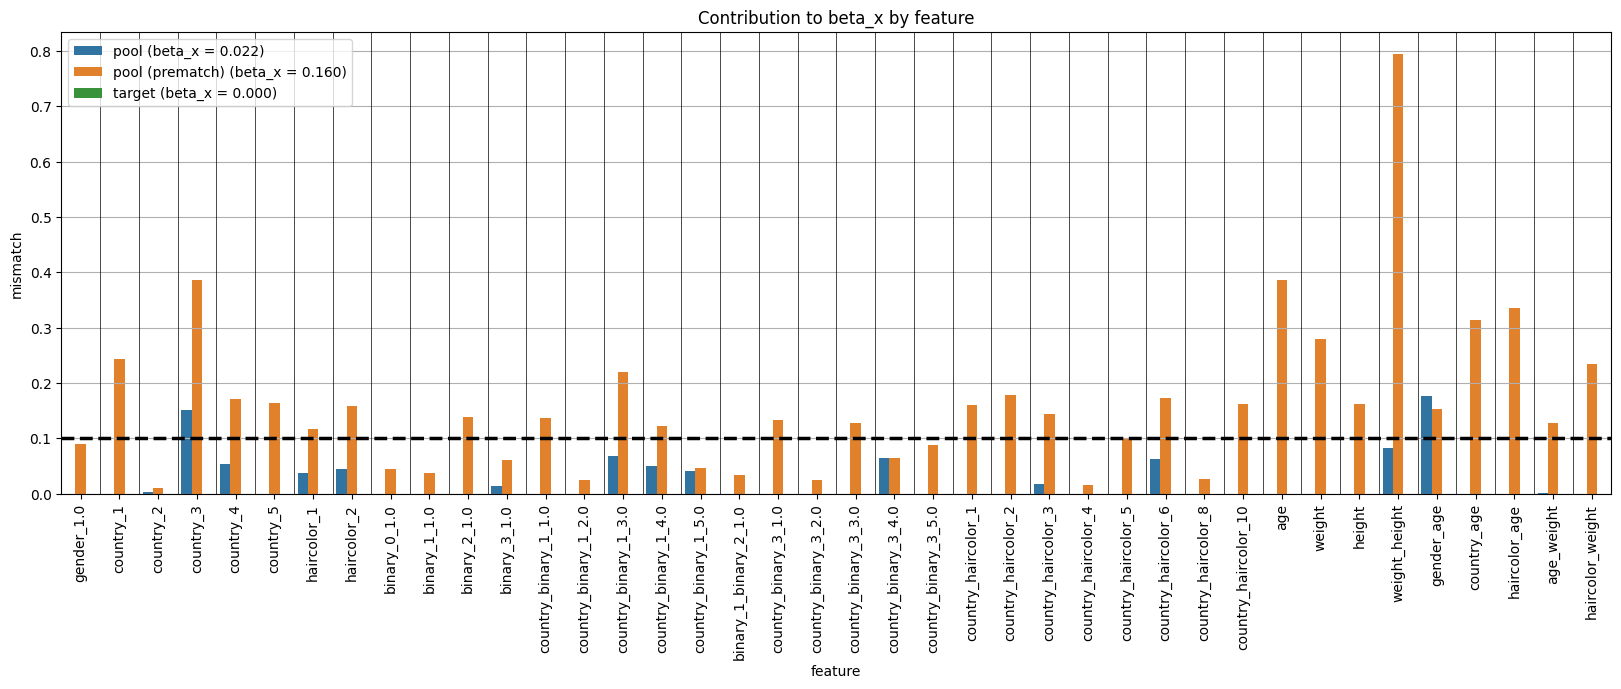

In [9]:
%matplotlib inline

match = matcher.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, objective, 'target', debin=False)

## Optimize Gamma (Area Between CDFs)

In [10]:
objective = gamma = GammaBalance(m)
matcher = matcher_gamma = ConstraintSatisfactionMatcher(
    m, 
    time_limit=time_limit,
    objective=objective,
    ps_hinting=True,
    parallel_solve=True)
matcher.get_params()

INFO [preprocess.py:338] Discretized age with bins [18.06, 27.55, 37.04, 46.53, 56.02, 65.51, 75.0].
INFO [preprocess.py:338] Discretized weight with bins [50.01, 61.67, 73.33, 85.0, 96.66, 108.32, 119.99].
INFO [preprocess.py:338] Discretized height with bins [125.01, 136.67, 148.33, 160.0, 171.66, 183.33, 194.99].
INFO [matcher.py:58] Scaling features by factor 2.00 in order to use integer solver with <= 0.1% loss.
INFO [matcher.py:61] With this scaling, the smallest value 1.0 is represented by 2.


{'objective': 'gamma',
 'match_size': 1000,
 'time_limit': 300,
 'parallel_solve': True,
 'ps_hinting': True,
 'verbose': True}

In [11]:
matcher.match()

INFO [matcher.py:308] Solving for match population with size = 1000. Will match on 27 dimensions ...
INFO [matcher.py:324] Calculating bounds on feature variables ...
INFO [matcher.py:339] Applying constraints ...
INFO [matcher.py:367] Training PS model as guide for solver ...
/pybalance/pybalance/cs/matcher.py:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.loc[:, "ix"] = list(range(len(target)))
/pybalance/pybalance/cs/matcher.py:370: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pool.loc[:, "ix

,age,weight,height,gender,country,haircolor,binary_0,binary_1,binary_2,binary_3,population
10000,25.588819,90.287540,138.373950,0.0,0,1,0.0,0.0,0.0,0.0,target
10001,58.178781,112.772237,131.676125,1.0,5,1,0.0,0.0,0.0,1.0,target
10002,45.214552,58.472329,174.666188,0.0,0,2,0.0,0.0,0.0,0.0,target
10003,42.283849,90.594823,141.086083,1.0,4,0,0.0,0.0,0.0,0.0,target
10004,67.793860,53.067147,187.259975,1.0,2,1,0.0,0.0,0.0,0.0,target
...,...,...,...,...,...,...,...,...,...,...,...
9952,72.962275,100.138854,153.432703,0.0,3,2,0.0,0.0,1.0,0.0,pool
9967,65.508418,114.445081,169.355529,1.0,1,1,0.0,1.0,0.0,0.0,pool
9980,32.074826,119.772964,177.513090,1.0,3,0,0.0,1.0,1.0,0.0,pool
9987,19.292851,74.783710,157.628330,0.0,1,2,0.0,1.0,0.0,0.0,pool


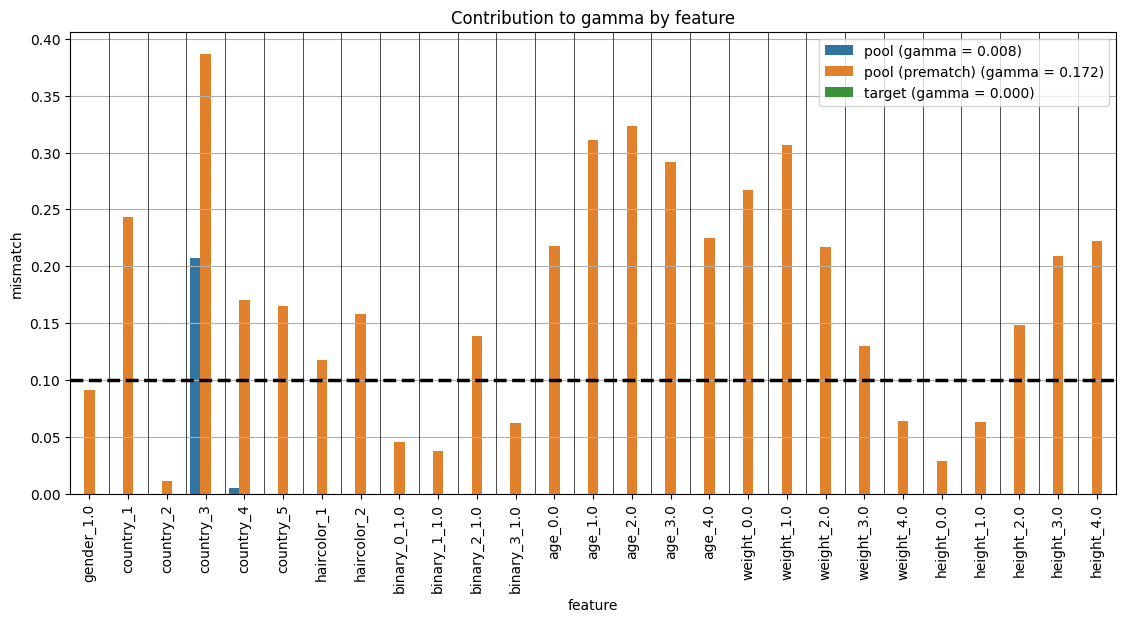

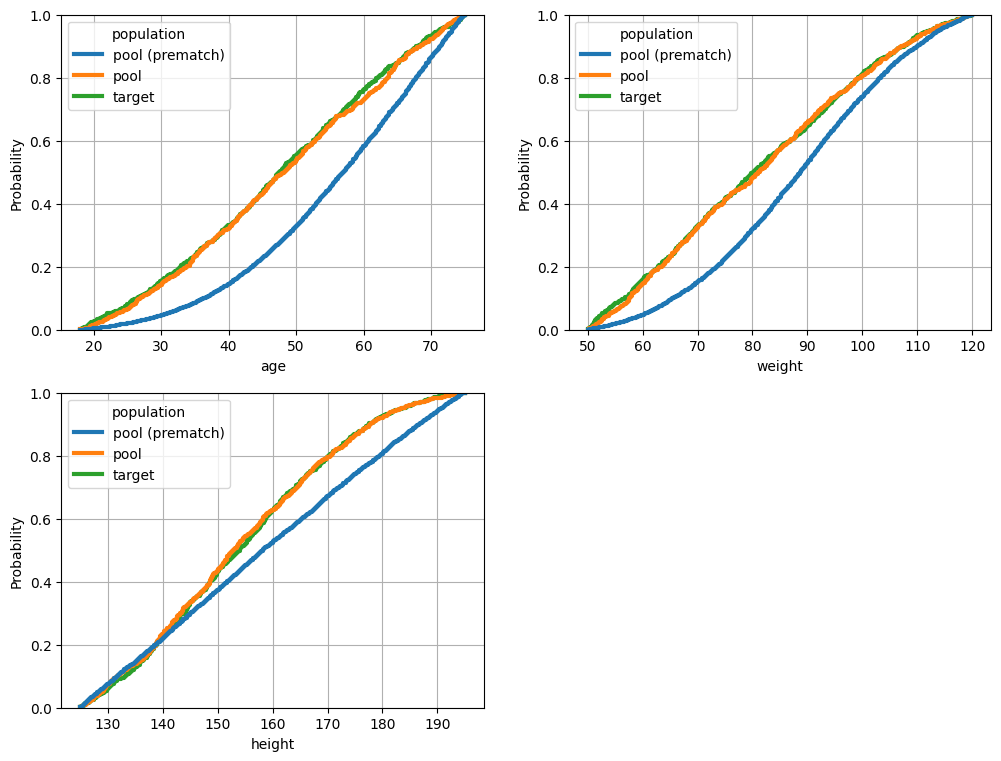

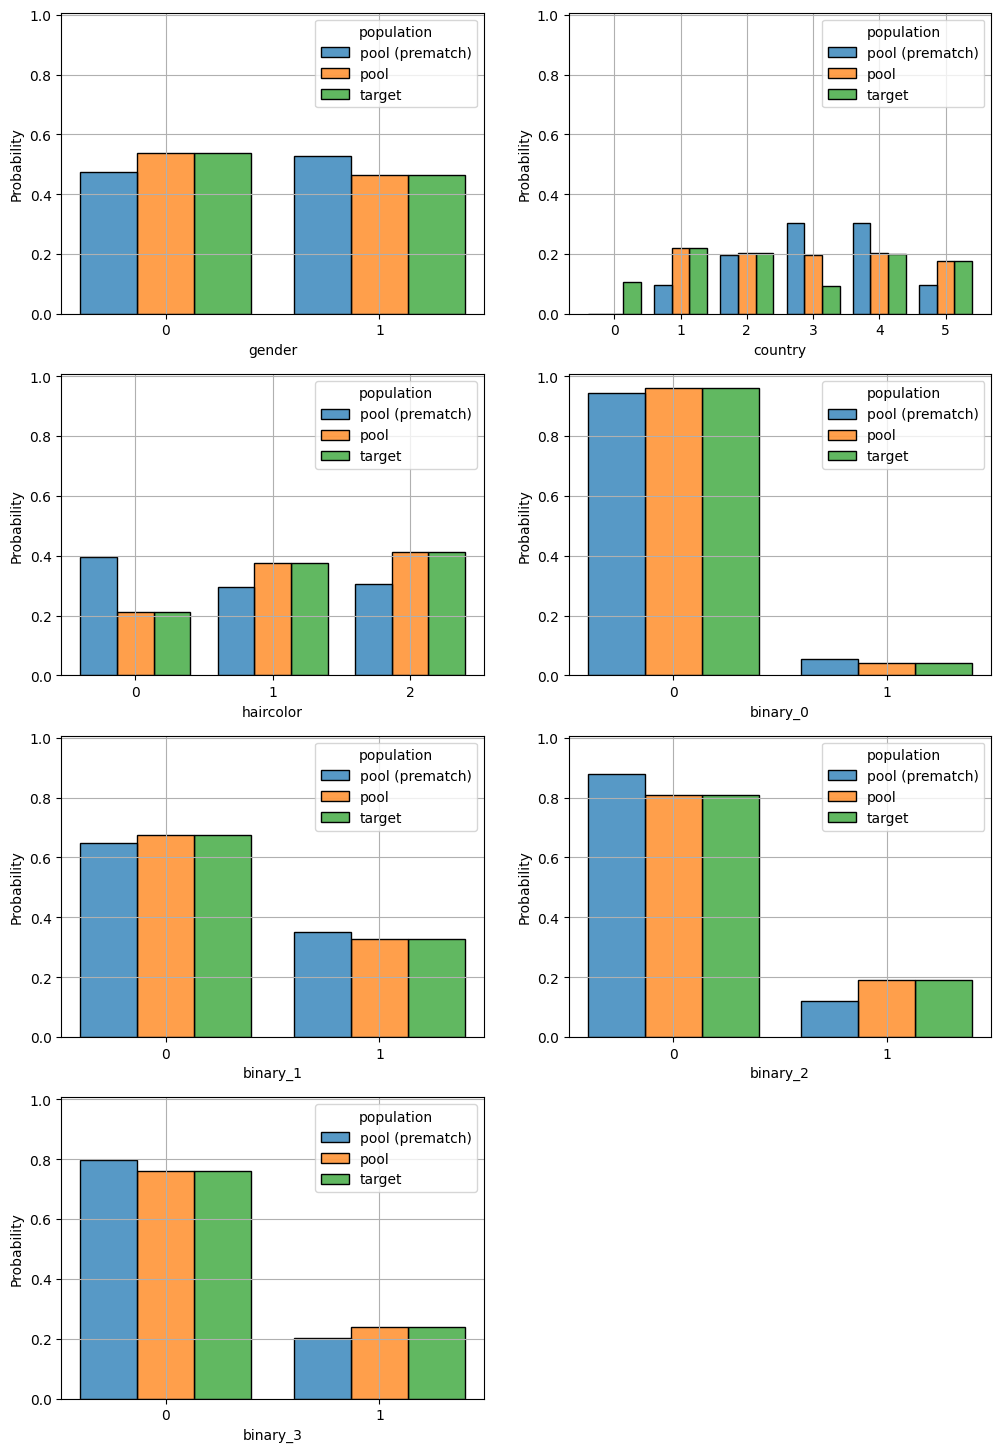

In [12]:
%matplotlib inline

match = matcher.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, objective, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])